In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

In [2]:
dataset_2 = pd.read_csv('dataset_banjir_DKI_Jakarta.csv')

In [3]:
dataset_2 = dataset_2.drop(['Unnamed: 0'], axis=1)

# Exploratory Data Analysis

In [4]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   kota_administrasi           35737 non-null  object 
 1   kecamatan                   35737 non-null  object 
 2   kelurahan                   35737 non-null  object 
 3   rw                          35737 non-null  int64  
 4   jumlah_terdampak_rt         35737 non-null  float64
 5   jumlah_terdampak_kk         35737 non-null  int64  
 6   jumlah_terdampak_jiwa       35737 non-null  int64  
 7   ketinggian_air              35737 non-null  int64  
 8   tanggal_kejadian            35737 non-null  int64  
 9   bulan                       35737 non-null  object 
 10  tahun                       35737 non-null  int64  
 11  lama_genangan               35737 non-null  float64
 12  jumlah_meninggal            35737 non-null  float64
 13  jumlah_hilang               357

In [5]:
dataset_2.duplicated().sum()

28633

Terdapat 26616 dari 33319 data yang duplikat dan tidak terdapat kolom null

In [6]:
cat = dataset_2.select_dtypes(include='object')


In [7]:
num = dataset_2.select_dtypes(include=['int','float'])

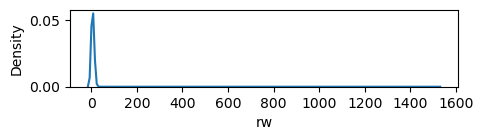

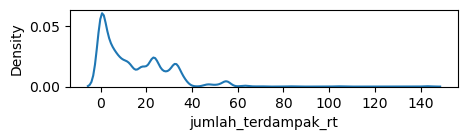

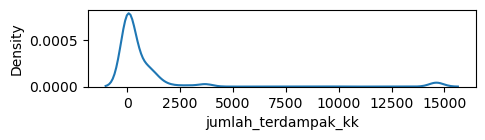

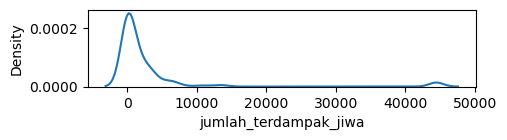

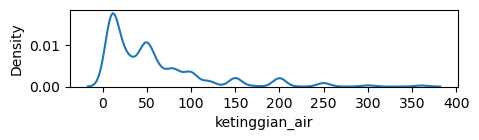

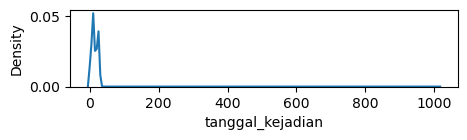

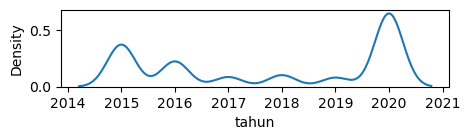

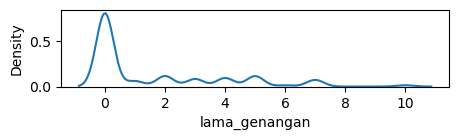

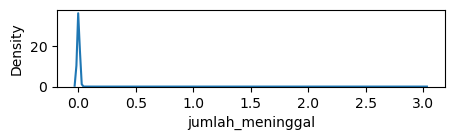

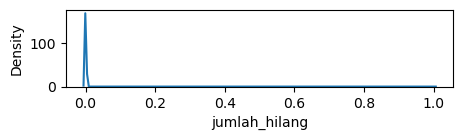

c:\Users\goodb\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


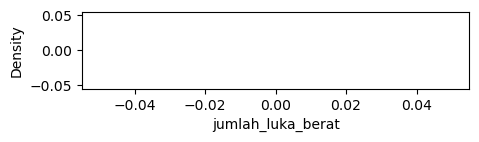

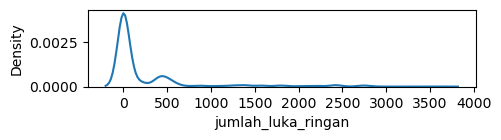

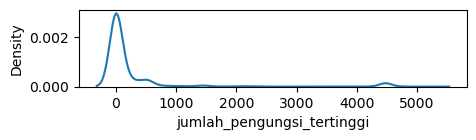

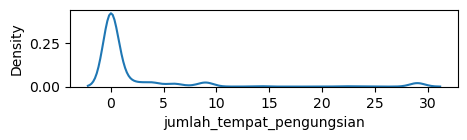

c:\Users\goodb\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


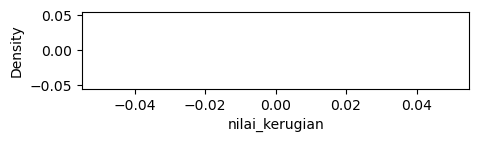

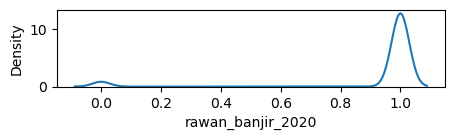

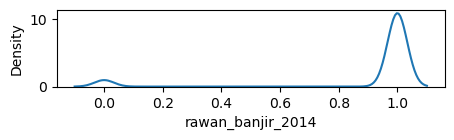

In [8]:
for col in num:
    plt.figure(figsize=(5, 1))
    sns.kdeplot(data=num, x=col)
    plt.show()

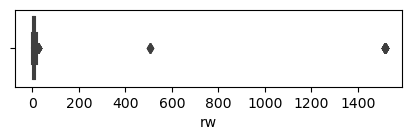

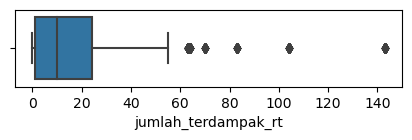

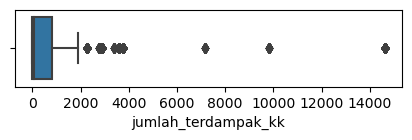

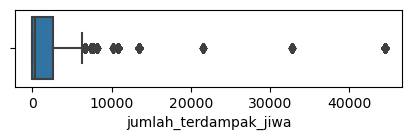

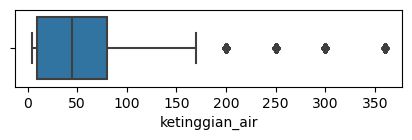

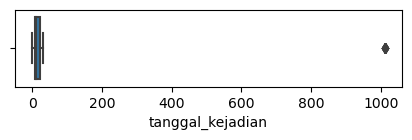

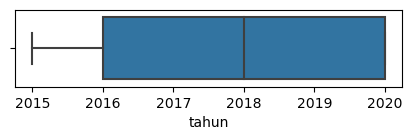

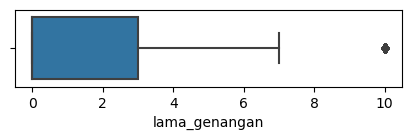

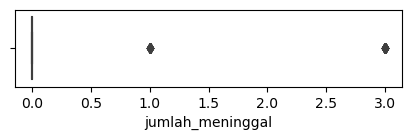

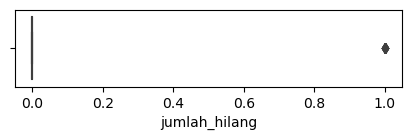

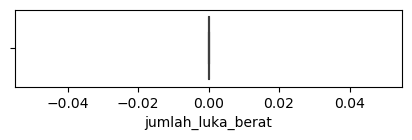

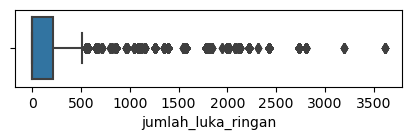

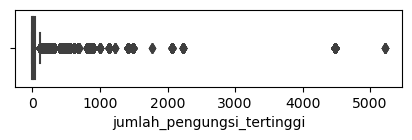

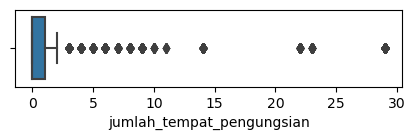

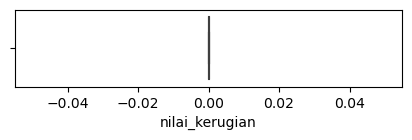

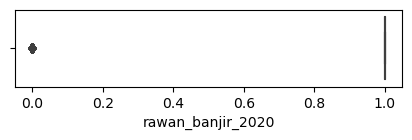

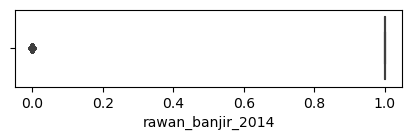

In [9]:
for col in num:
    plt.figure(figsize=(5, 1))
    sns.boxplot(data=num, x=col)
    plt.show()

<AxesSubplot:>

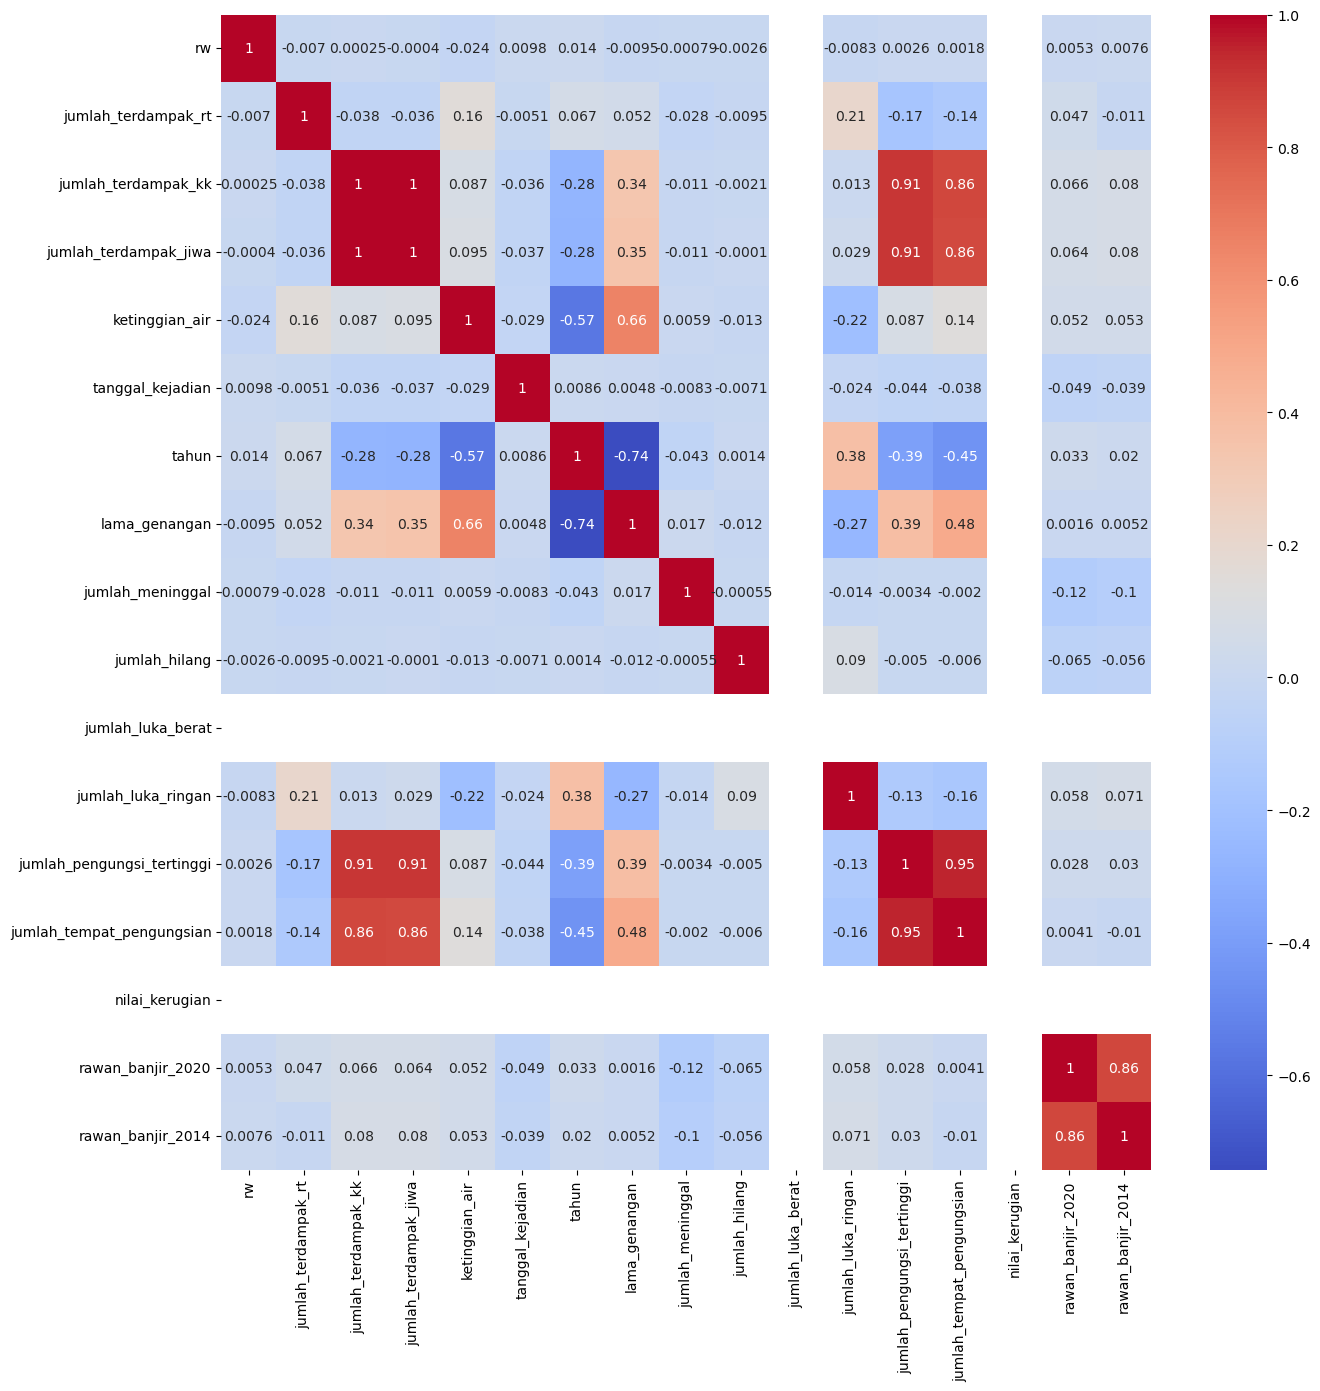

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(num.corr(), annot=True, cmap='coolwarm')

<Figure size 1000x500 with 0 Axes>

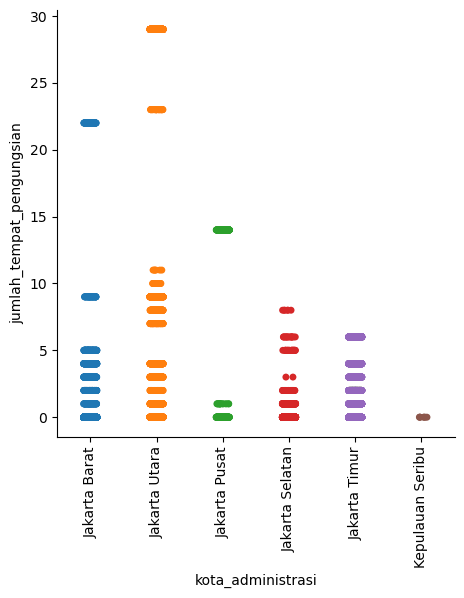

In [11]:
plt.figure(figsize=(10, 5))
sns.catplot(data=dataset_2, x='kota_administrasi', y='jumlah_tempat_pengungsian')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x500 with 0 Axes>

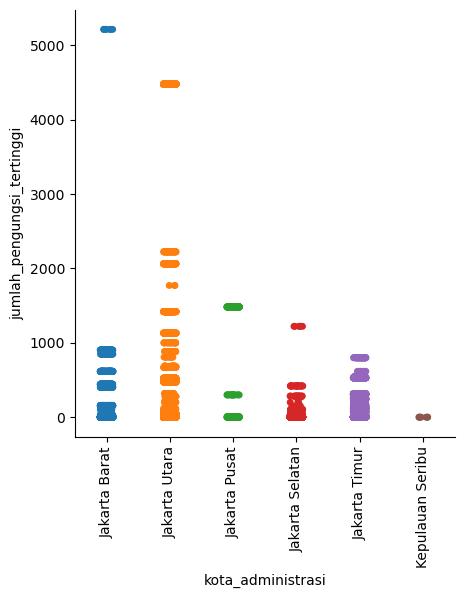

In [12]:
plt.figure(figsize=(10, 5))
sns.catplot(data=dataset_2, x='kota_administrasi', y='jumlah_pengungsi_tertinggi')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x500 with 0 Axes>

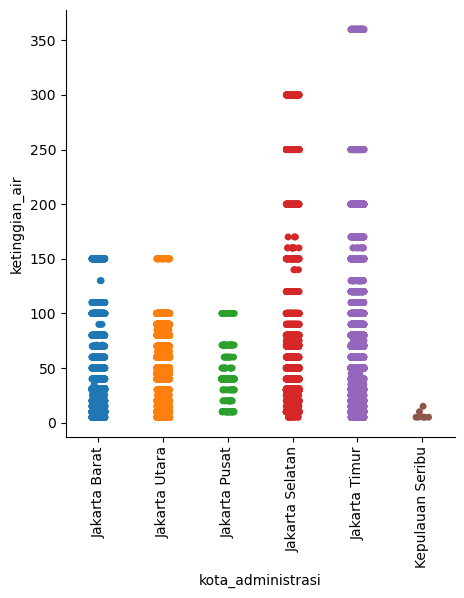

In [13]:
plt.figure(figsize=(10, 5))
sns.catplot(data=dataset_2, x='kota_administrasi', y='ketinggian_air')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x500 with 0 Axes>

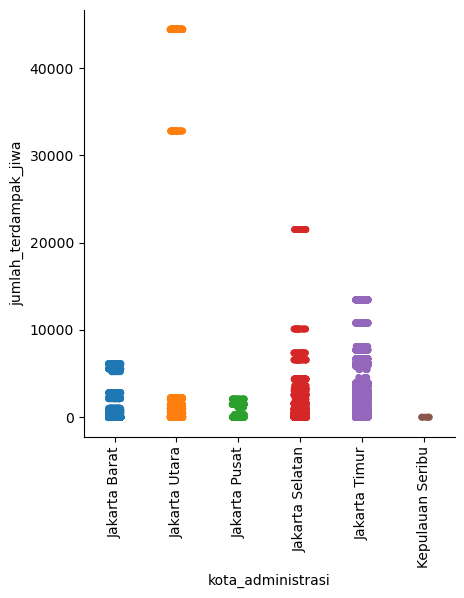

In [14]:
plt.figure(figsize=(10, 5))
sns.catplot(data=dataset_2, x='kota_administrasi', y='jumlah_terdampak_jiwa')
plt.xticks(rotation=90)
plt.show()

# Clustering

In [15]:
clustering = dataset_2.drop_duplicates()

In [16]:
pd.set_option('display.max_columns', None)
clustering.head(1)

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,bulan,tahun,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,sungai,rawan_banjir_2020,rawan_banjir_2014
0,Jakarta Barat,Cengkareng,Kapuk,1,0.0,1468,5538,40,23,Januari,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ANGKE,1,1


## Label Encoding

In [17]:
clustering['bulan'].unique()

array(['Januari', 'Februari', 'Maret', 'April', 'November', 'Mei', 'Juni',
       'Juli', 'Agustus', 'September', 'Oktober', 'Desember'],
      dtype=object)

In [18]:
month_labeling = {'Januari':1, 'Februari':2, 'Maret':3, 'April':4, 'Mei':5, 'Juni':6, 'Juli':7, 
                  'Agustus':8, 'September':9, 'Oktober':10, 'November':11, 'Desember':12}

clustering['bulan'] = clustering['bulan'].replace(month_labeling)

C:\Users\goodb\AppData\Local\Temp\ipykernel_3752\2183336503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering['bulan'] = clustering['bulan'].replace(month_labeling)


In [19]:
cat = cat.drop(['bulan'], axis=1)

In [20]:
label_encoder = LabelEncoder()
for col in cat:
    clustering[col] = label_encoder.fit_transform(clustering[col])
    label_names = label_encoder.classes_  # Mendapatkan nama label yang diubah
    print(f"Nama label yang diubah pada kolom {col}:")
    print(label_names)
    print()

Nama label yang diubah pada kolom kota_administrasi:
['Jakarta Barat' 'Jakarta Pusat' 'Jakarta Selatan' 'Jakarta Timur'
 'Jakarta Utara' 'Kepulauan Seribu']

Nama label yang diubah pada kolom kecamatan:
['CAKUNG' 'CEMPAKA PUTIH' 'CENGKARENG' 'CILANDAK' 'CILIINCING' 'CILINCING'
 'CIPAYUNG' 'CIRACAS' 'Cakung' 'Cengkareng' 'Cilandak' 'Cilincing'
 'Cipayung' 'Ciracas' 'DUREN SAWIT' 'Duren Sawit' 'GROGOL PETAMBURAN'
 'Gambir' 'Grogol Petamburan' 'JAGAKARSA' 'JATINEGARA' 'JATINEGARA '
 'JOHAR BARU' 'Jagakarsa' 'Jatinegara' 'Johar Baru' 'KALI DERES'
 'KALIDERES' 'KEBAYORAN BARU' 'KEBAYORAN LAMA' 'KEBON JERUK'
 'KEC, PASAR MINGGU' 'KEC. CAKUNG' 'KEC. CENGKARENG' 'KEC. CENGKARENG '
 'KEC. CILANDAK' 'KEC. CILINCING' 'KEC. CIRACAS' 'KEC. GROGOL PETAMBURAN'
 'KEC. JATINEGARA' 'KEC. KALI DERES' 'KEC. KALIDERES'
 'KEC. KEBAYORAN BARU' 'KEC. KEBAYORAN LAMA' 'KEC. KEBON JERUK'
 'KEC. KELAPA GADING' 'KEC. KEMBANGAN' 'KEC. KEMBANGAN ' 'KEC. KOJA'
 'KEC. KRAMAT JATI' 'KEC. MAKASAR' 'KEC. MAMPANG PRAPATAN

C:\Users\goodb\AppData\Local\Temp\ipykernel_3752\1854564561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering[col] = label_encoder.fit_transform(clustering[col])
C:\Users\goodb\AppData\Local\Temp\ipykernel_3752\1854564561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering[col] = label_encoder.fit_transform(clustering[col])
C:\Users\goodb\AppData\Local\Temp\ipykernel_3752\1854564561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [21]:
clustering

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,bulan,tahun,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,sungai,rawan_banjir_2020,rawan_banjir_2014
0,0,9,79,1,0.0,1468,5538,40,23,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
16,0,9,79,1,0.0,1468,5538,40,24,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
32,0,9,79,2,0.0,1468,5538,40,23,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
48,0,9,79,2,0.0,1468,5538,40,24,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
64,0,9,79,5,0.0,1468,5538,40,23,1,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,5,64,174,1,1.0,0,0,5,15,12,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0,0
35731,5,64,174,0,1.0,0,0,5,15,12,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0,0
35732,5,64,174,0,1.0,0,0,10,15,12,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0,0
35734,5,64,174,0,1.0,0,0,15,15,12,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0,0


# Data Transformation

In [22]:
dataset_train = pd.DataFrame()
# Mengambil nama kolom dalam dataset
columns = clustering.columns

scaler = StandardScaler()
# Melakukan normalisasi pada semua kolom
dataset_train[columns] = scaler.fit_transform(clustering[columns])


In [23]:
dataset_train

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,bulan,tahun,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,sungai,rawan_banjir_2020,rawan_banjir_2014
0,-1.772753,-1.119936,-0.374665,-0.181761,-0.703169,0.533023,0.683551,-0.279308,0.211693,-0.810644,-1.278784,0.199803,-0.069314,-0.037545,0.0,-0.365611,-0.293416,-0.362823,0.0,-1.406419,0.664058,0.821390
1,-1.772753,-1.119936,-0.374665,-0.181761,-0.703169,0.533023,0.683551,-0.279308,0.239118,-0.810644,-1.278784,0.199803,-0.069314,-0.037545,0.0,-0.365611,-0.293416,-0.362823,0.0,-1.406419,0.664058,0.821390
2,-1.772753,-1.119936,-0.374665,-0.151404,-0.703169,0.533023,0.683551,-0.279308,0.211693,-0.810644,-1.278784,0.199803,-0.069314,-0.037545,0.0,-0.365611,-0.293416,-0.362823,0.0,-1.406419,0.664058,0.821390
3,-1.772753,-1.119936,-0.374665,-0.151404,-0.703169,0.533023,0.683551,-0.279308,0.239118,-0.810644,-1.278784,0.199803,-0.069314,-0.037545,0.0,-0.365611,-0.293416,-0.362823,0.0,-1.406419,0.664058,0.821390
4,-1.772753,-1.119936,-0.374665,-0.060333,-0.703169,0.533023,0.683551,-0.279308,0.211693,-0.810644,-1.278784,0.199803,-0.069314,-0.037545,0.0,-0.365611,-0.293416,-0.362823,0.0,-1.406419,0.664058,0.821390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7099,1.958253,0.332361,0.941200,-0.181761,-0.651869,-0.278812,-0.302896,-0.938756,-0.007710,2.879399,1.020969,-0.701978,-0.069314,-0.037545,0.0,-0.365611,-0.293416,-0.362823,0.0,1.099246,-1.505892,-1.217448
7100,1.958253,0.332361,0.941200,-0.212118,-0.651869,-0.278812,-0.302896,-0.938756,-0.007710,2.879399,1.020969,-0.701978,-0.069314,-0.037545,0.0,-0.365611,-0.293416,-0.362823,0.0,1.099246,-1.505892,-1.217448
7101,1.958253,0.332361,0.941200,-0.212118,-0.651869,-0.278812,-0.302896,-0.844549,-0.007710,2.879399,1.020969,-0.701978,-0.069314,-0.037545,0.0,-0.365611,-0.293416,-0.362823,0.0,1.099246,-1.505892,-1.217448
7102,1.958253,0.332361,0.941200,-0.212118,-0.651869,-0.278812,-0.302896,-0.750342,-0.007710,2.879399,1.020969,-0.701978,-0.069314,-0.037545,0.0,-0.365611,-0.293416,-0.362823,0.0,1.099246,-1.505892,-1.217448


## PCA

In [24]:
pcs = PCA(n_components=5).fit_transform(clustering)
pcs = pd.DataFrame(pcs, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pcs

,PC1,PC2,PC3,PC4,PC5
0,3925.501503,18.434477,-473.296381,287.958837,-3.232006
1,3925.501413,18.432530,-473.296810,287.961288,-3.257727
2,3925.501499,18.433956,-473.296323,287.957145,-3.246825
3,3925.501409,18.432009,-473.296753,287.959596,-3.272546
4,3925.501486,18.432393,-473.296149,287.952068,-3.291281
...,...,...,...,...,...
7099,-1782.130294,-133.626883,-118.532325,-31.557105,-77.166440
7100,-1782.130290,-133.626362,-118.532383,-31.555413,-77.151621
7101,-1782.124627,-133.710954,-118.555200,-31.185011,-76.215944
7102,-1782.118965,-133.795546,-118.578018,-30.814609,-75.280267


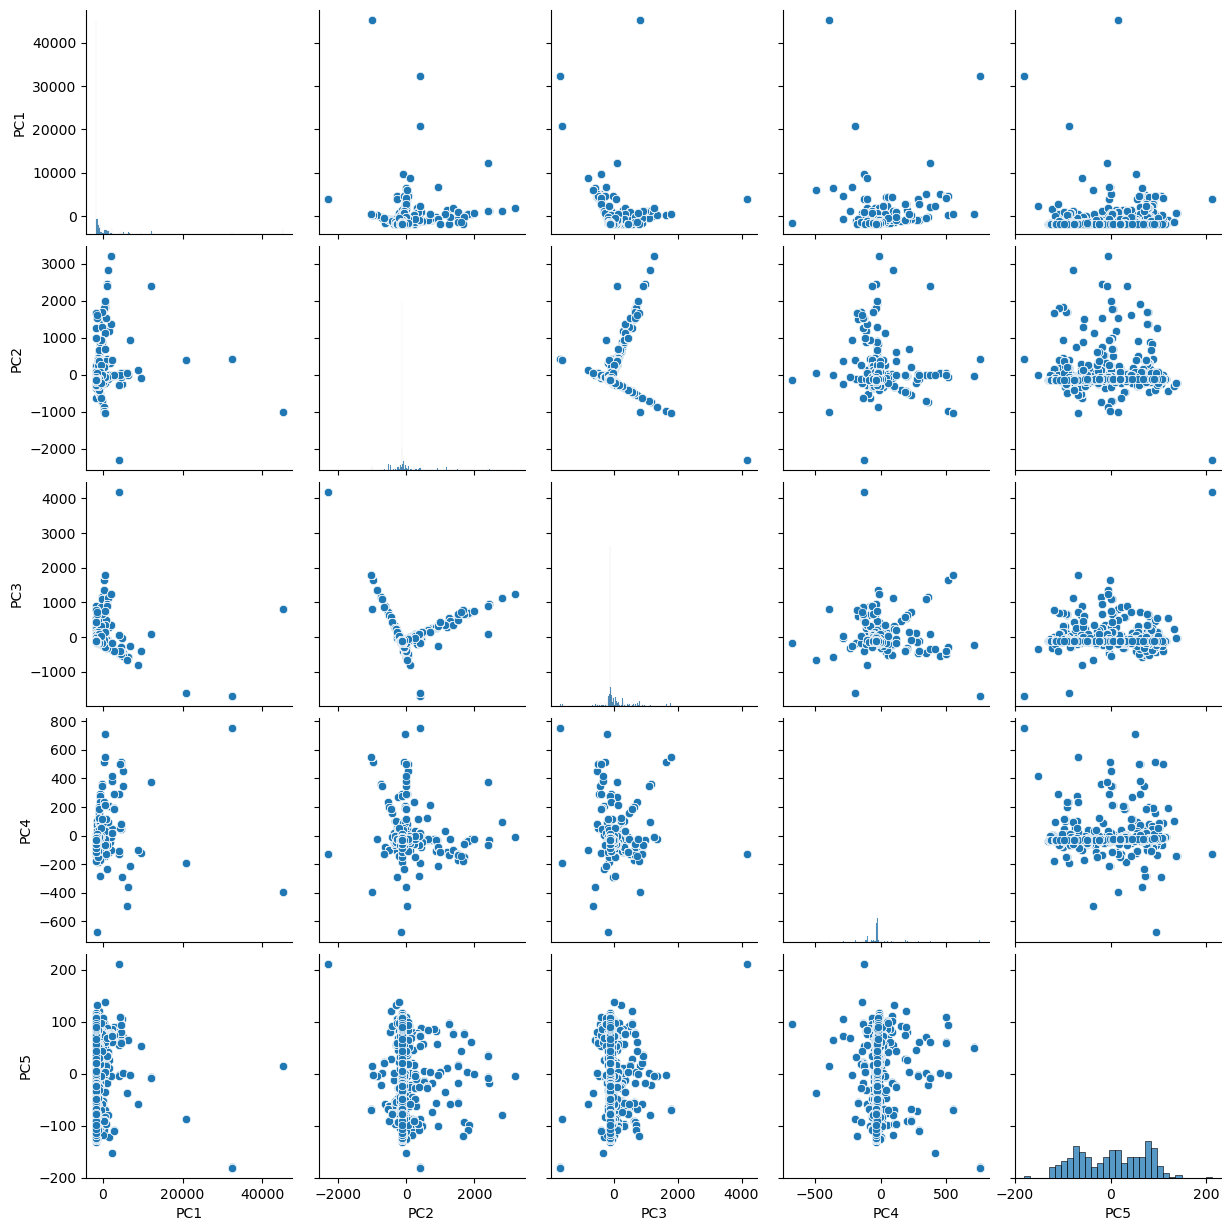

In [25]:
sns.pairplot(pcs)

## Modeling

c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\goodb\anaconda3\lib\site-packages\sklearn\clust

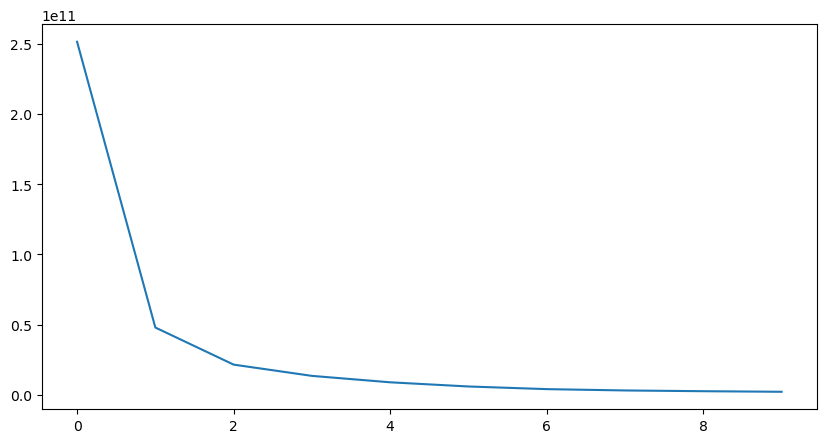

In [26]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42, init='k-means++', max_iter=300)
    kmeans.fit(pcs)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(inertia)

In [27]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=3)
birch_model = birch.fit(pcs)
label = birch_model.predict(pcs)

score = silhouette_score(pcs, label)
score


0.7995040263679809

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
model_kmeans = kmeans.fit(pcs)

score = silhouette_score(pcs, model_kmeans.labels_)
score


c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8333690494084716

In [31]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(pcs)
dbscan_labels = dbscan.labels_

score = silhouette_score(pcs, dbscan_labels)
score


0.631902537252137

In [30]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_pred = model.fit_predict(pcs)

score = silhouette_score(pcs, y_pred)
score

c:\Users\goodb\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.9265189699987693

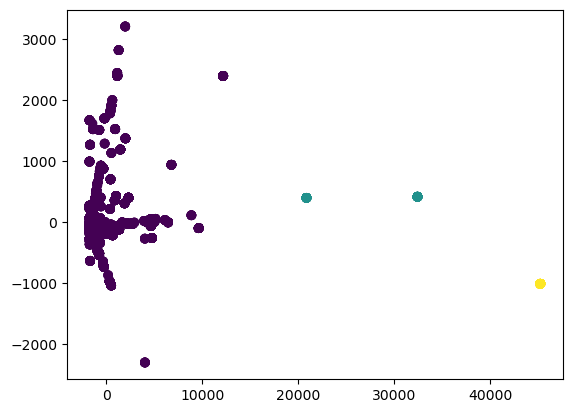

In [30]:
plt.scatter(pcs['PC1'], pcs['PC2'], c=y_pred, cmap='viridis')

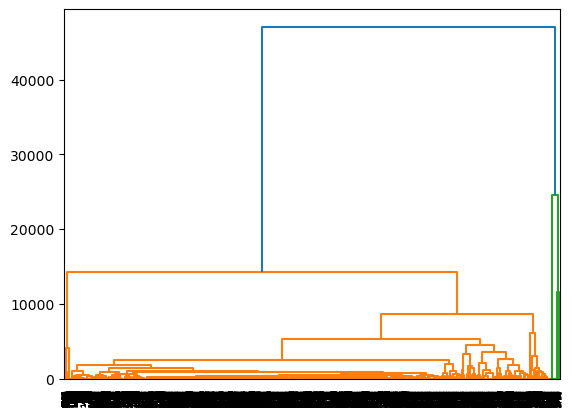

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(pcs, 'complete')

dendrogram(linked)
plt.show()

In [33]:
clustering['cluster'] = y_pred

C:\Users\goodb\AppData\Local\Temp\ipykernel_10620\3138723684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering['cluster'] = y_pred


In [34]:
clustering['cluster'].value_counts()

0    6964
2      80
1      60
Name: cluster, dtype: int64

# Testing Model

In [35]:
Model = dataset_2.drop_duplicates()

In [36]:
Model['segmentasi'] = y_pred

C:\Users\goodb\AppData\Local\Temp\ipykernel_10620\2236018157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model['segmentasi'] = y_pred


In [37]:
label_encoder = LabelEncoder()
col = ['rawan_banjir_2014','rawan_banjir_2020']
Model['rawan_banjir_2020'] = label_encoder.fit_transform(Model['rawan_banjir_2020'])
Model['rawan_banjir_2014'] = label_encoder.fit_transform(Model['rawan_banjir_2014'])

C:\Users\goodb\AppData\Local\Temp\ipykernel_10620\2882990023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model['rawan_banjir_2020'] = label_encoder.fit_transform(Model['rawan_banjir_2020'])
C:\Users\goodb\AppData\Local\Temp\ipykernel_10620\2882990023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model['rawan_banjir_2014'] = label_encoder.fit_transform(Model['rawan_banjir_2014'])


In [38]:
Model.head(1)

,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,bulan,tahun,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,sungai,rawan_banjir_2020,rawan_banjir_2014,segmentasi
0,Jakarta Barat,Cengkareng,Kapuk,1,0.0,1468,5538,40,23,Januari,2015,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ANGKE,1,1,0


<Figure size 1000x500 with 0 Axes>

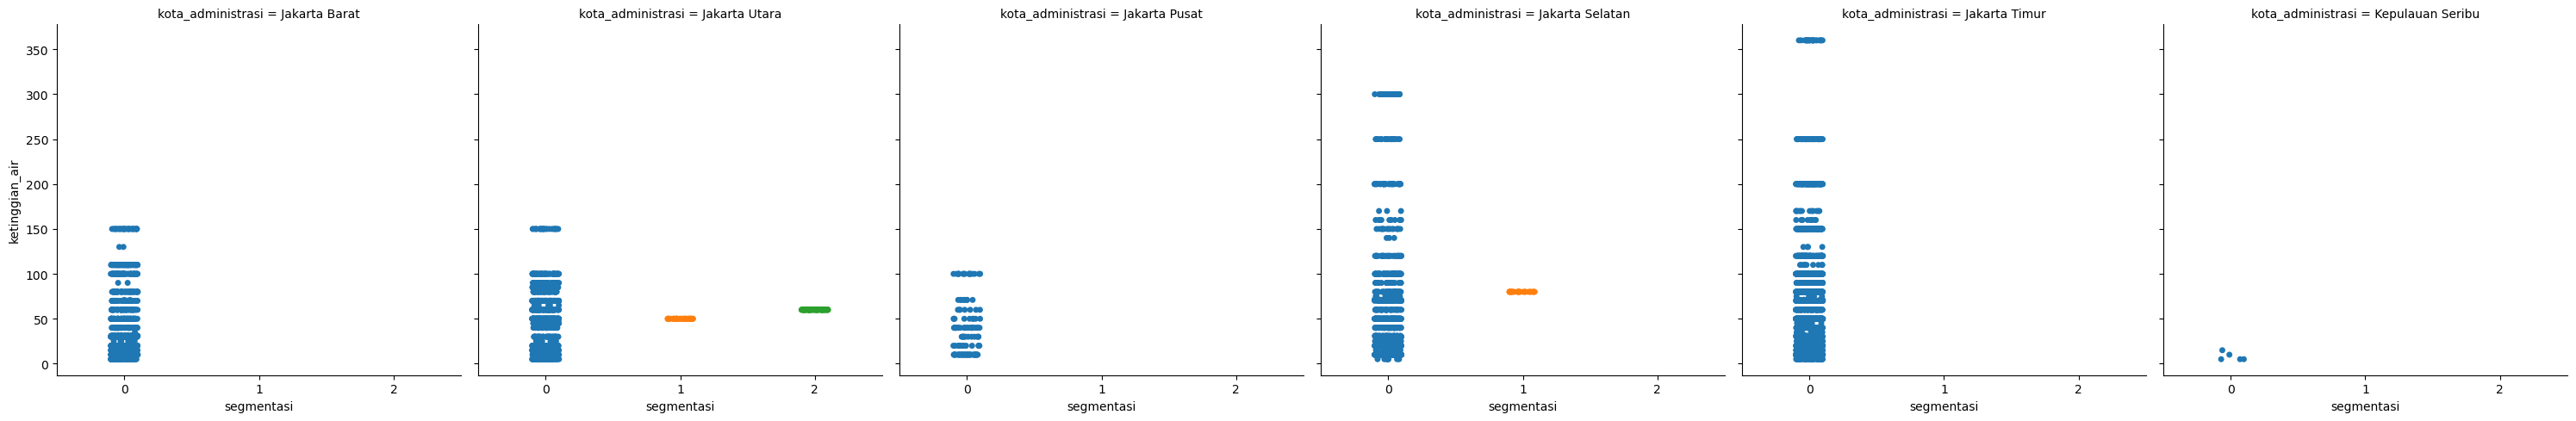

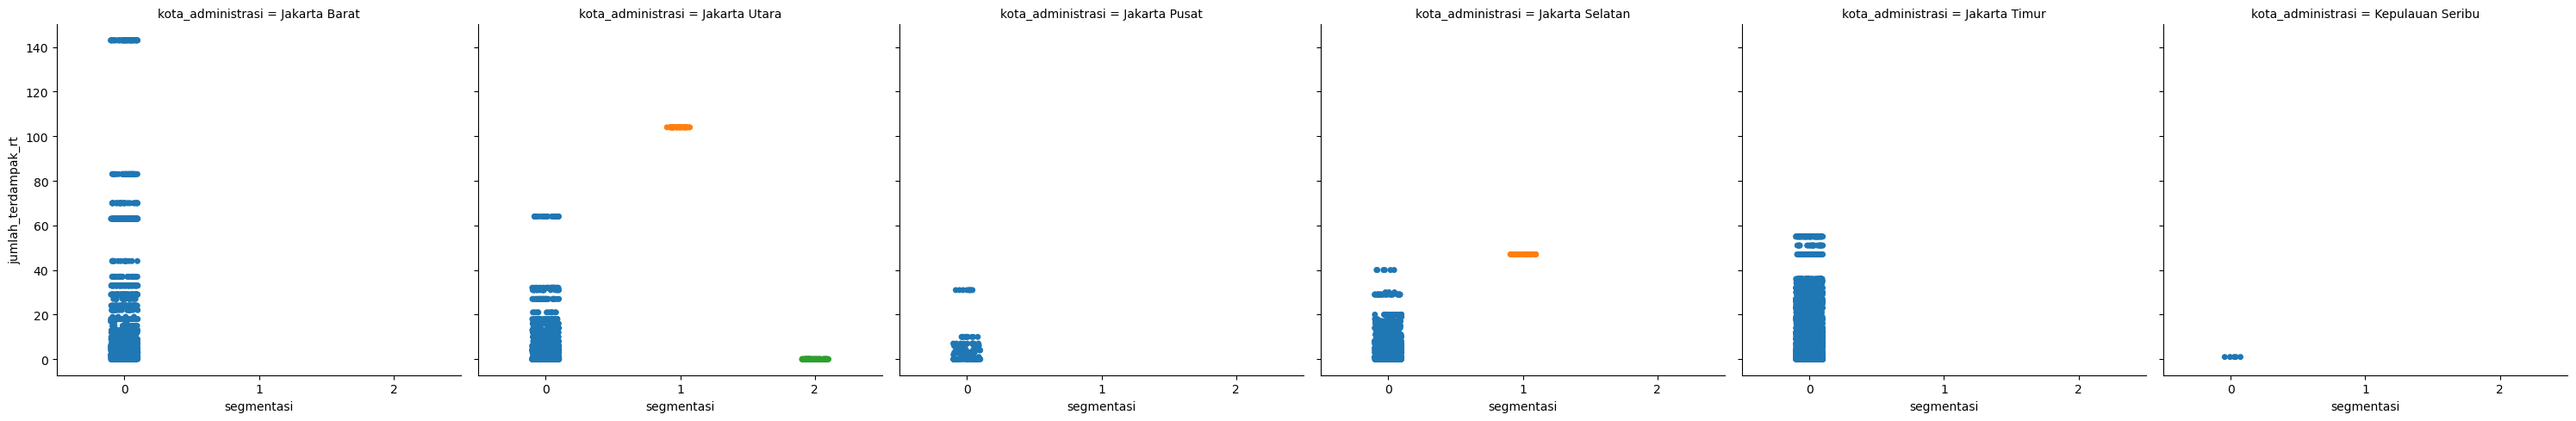

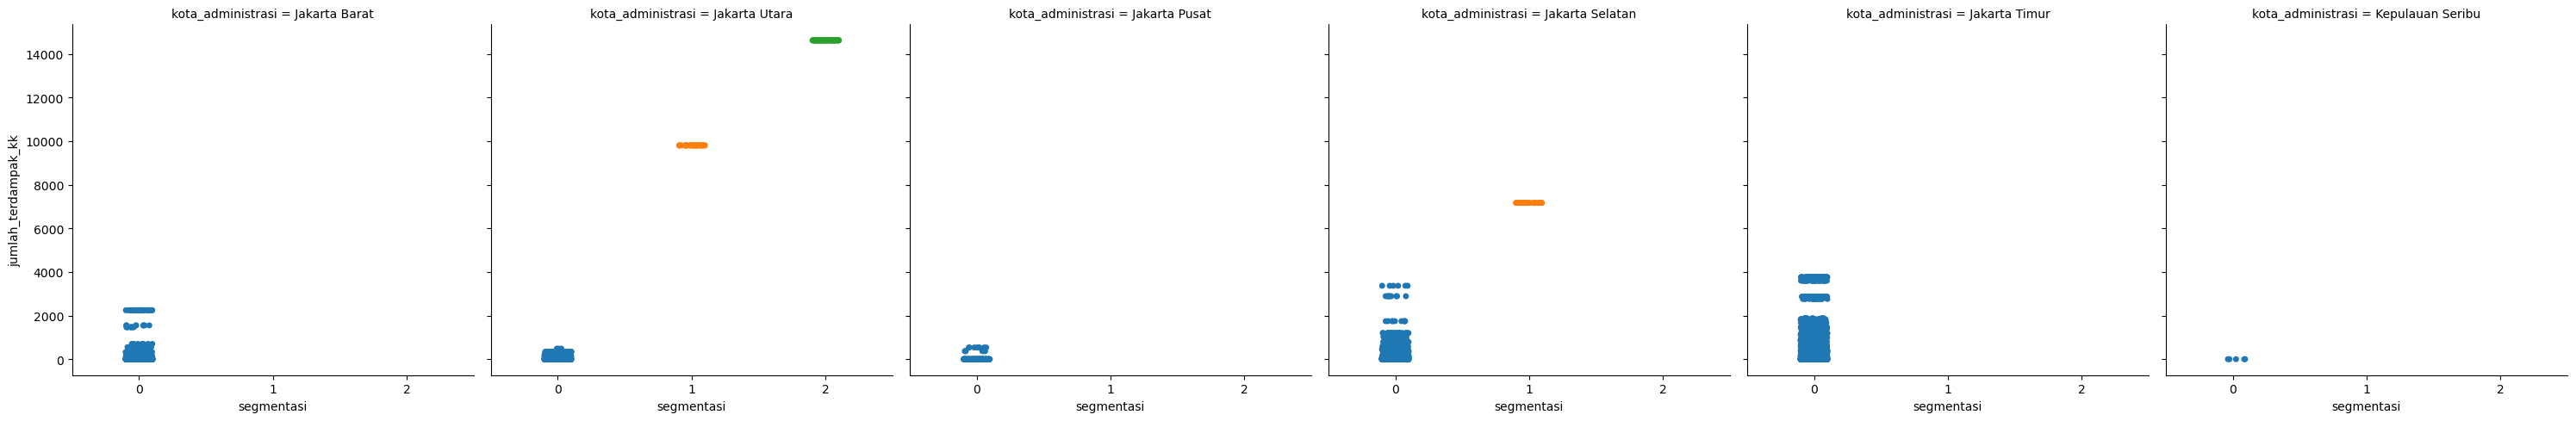

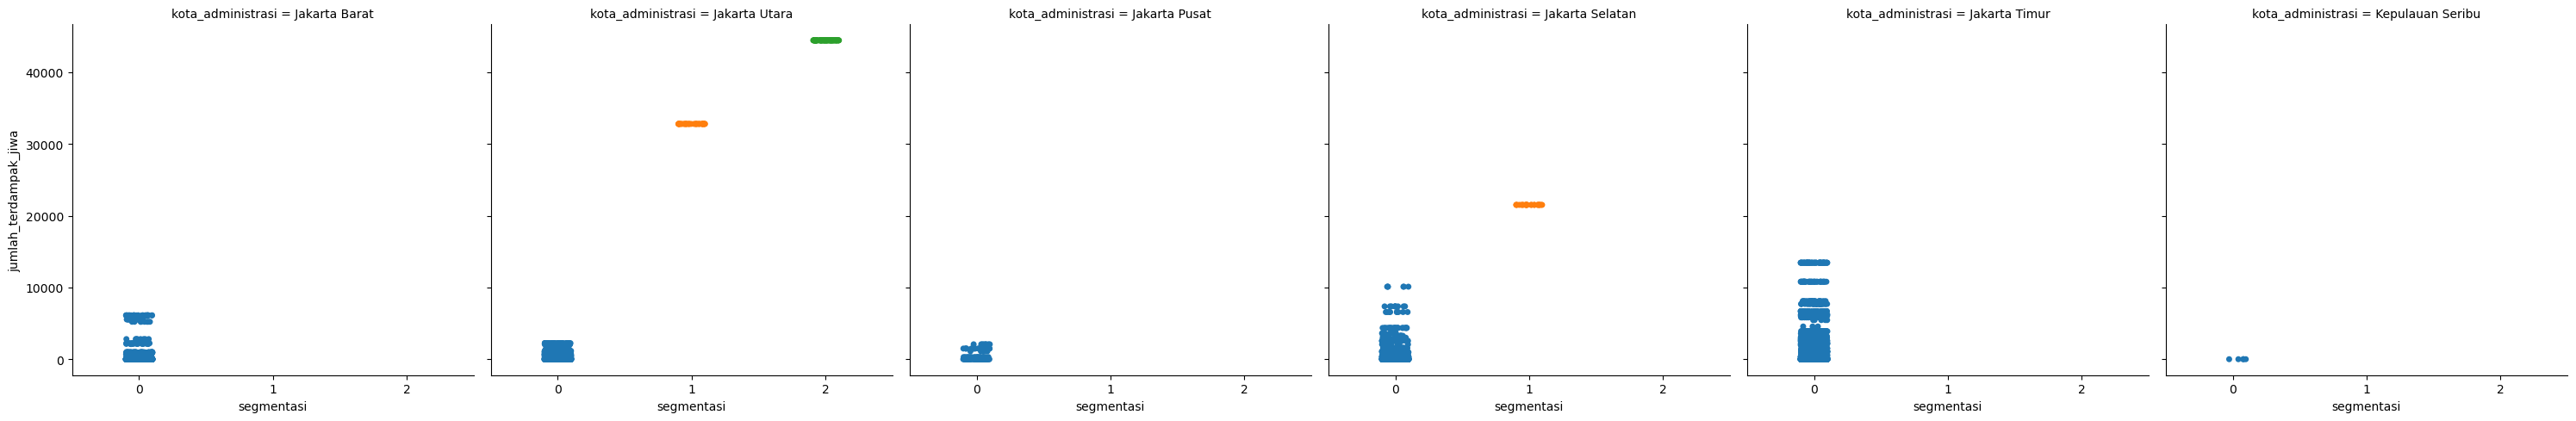

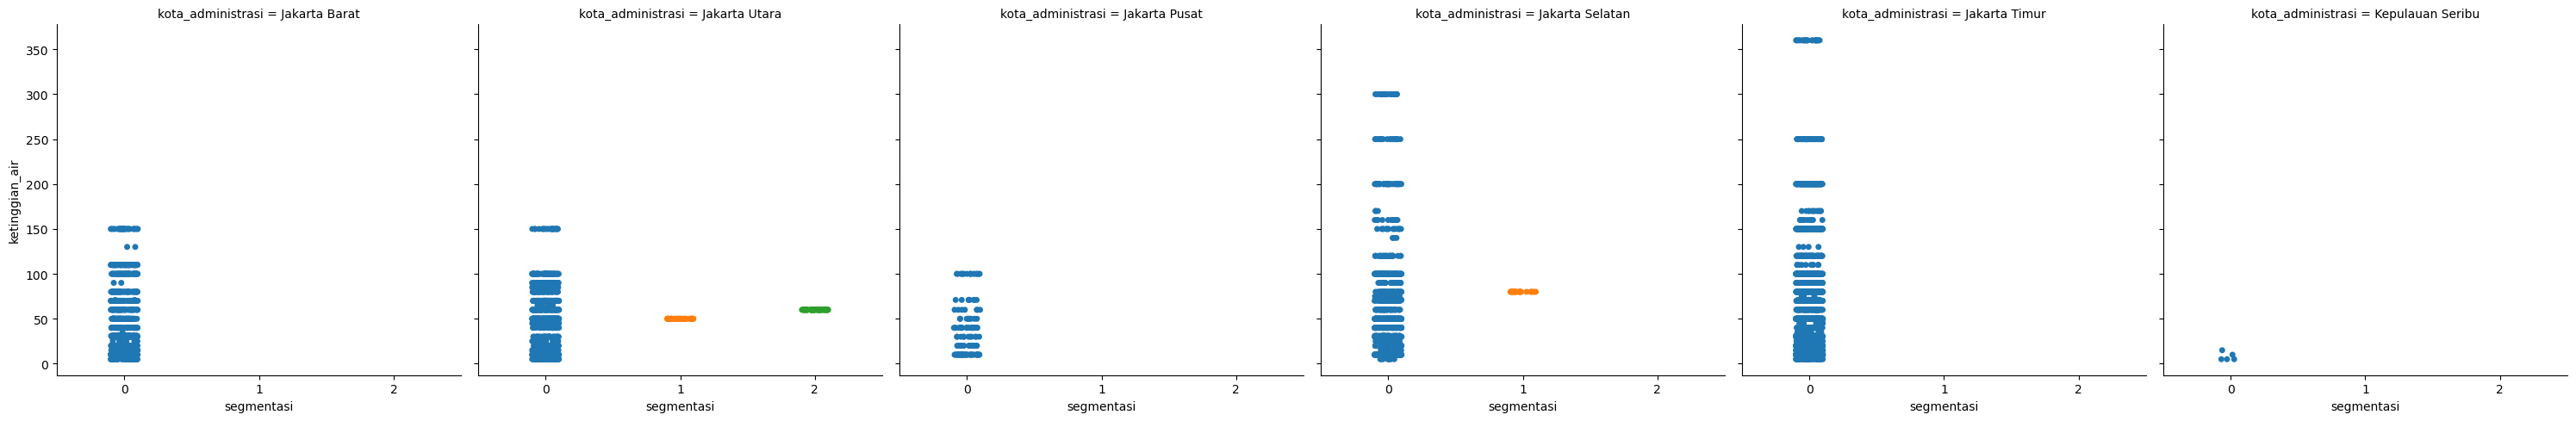

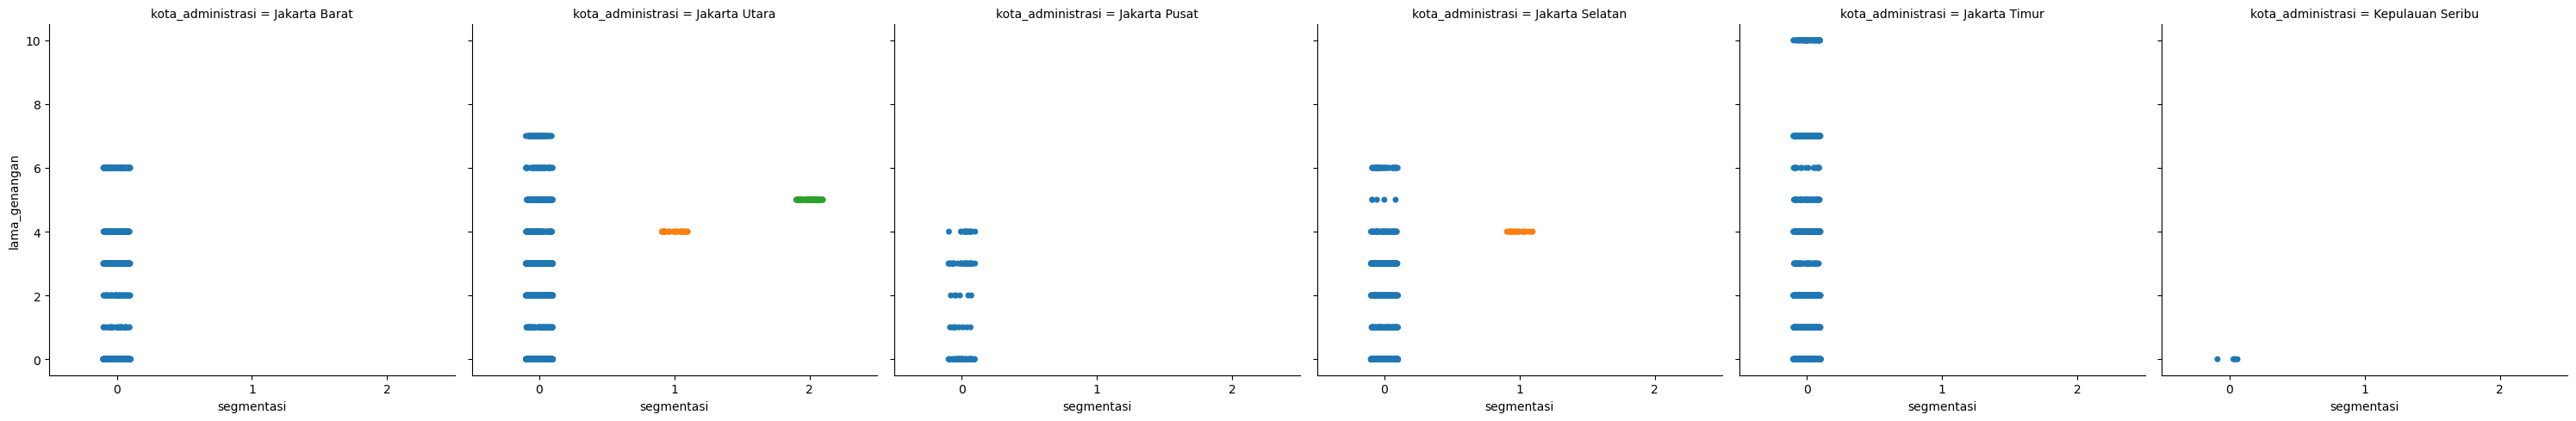

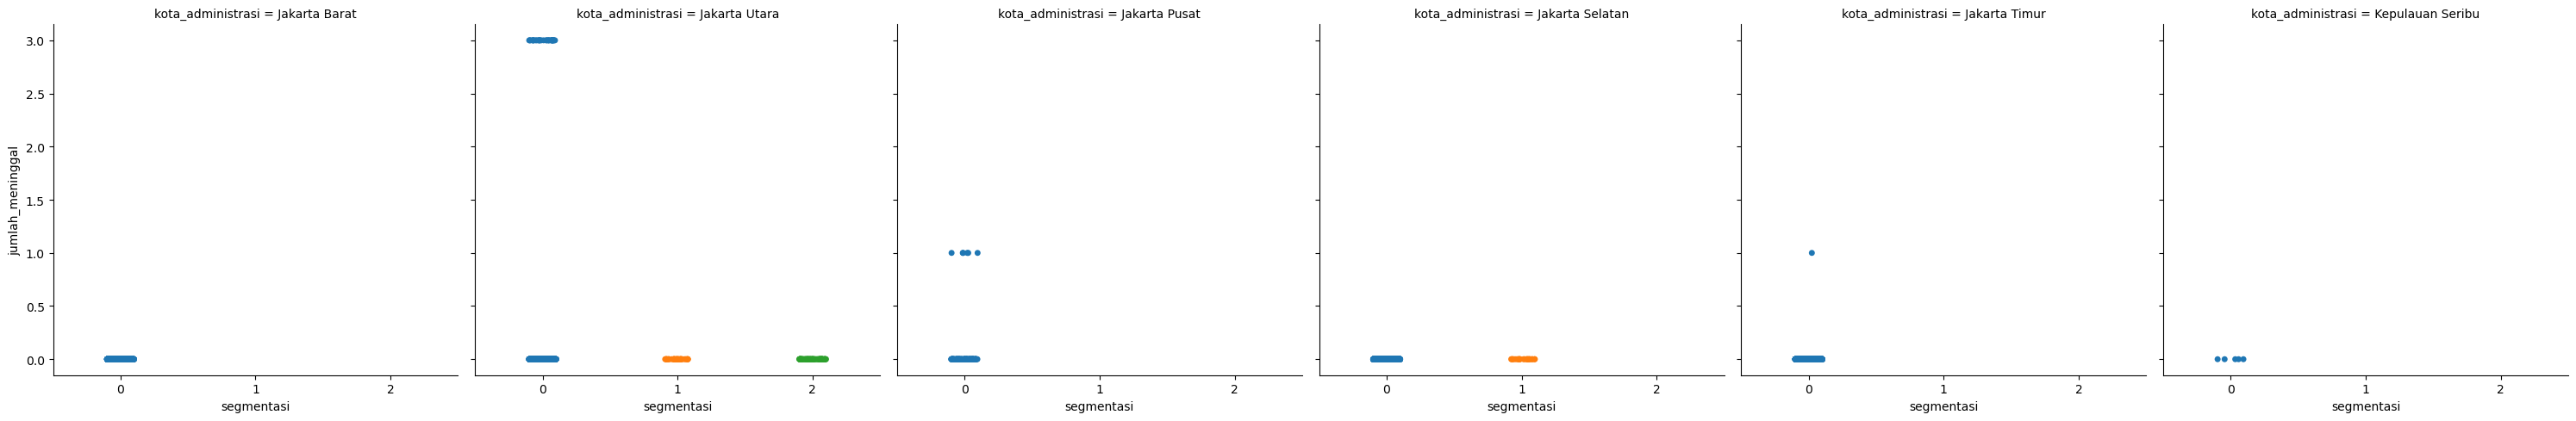

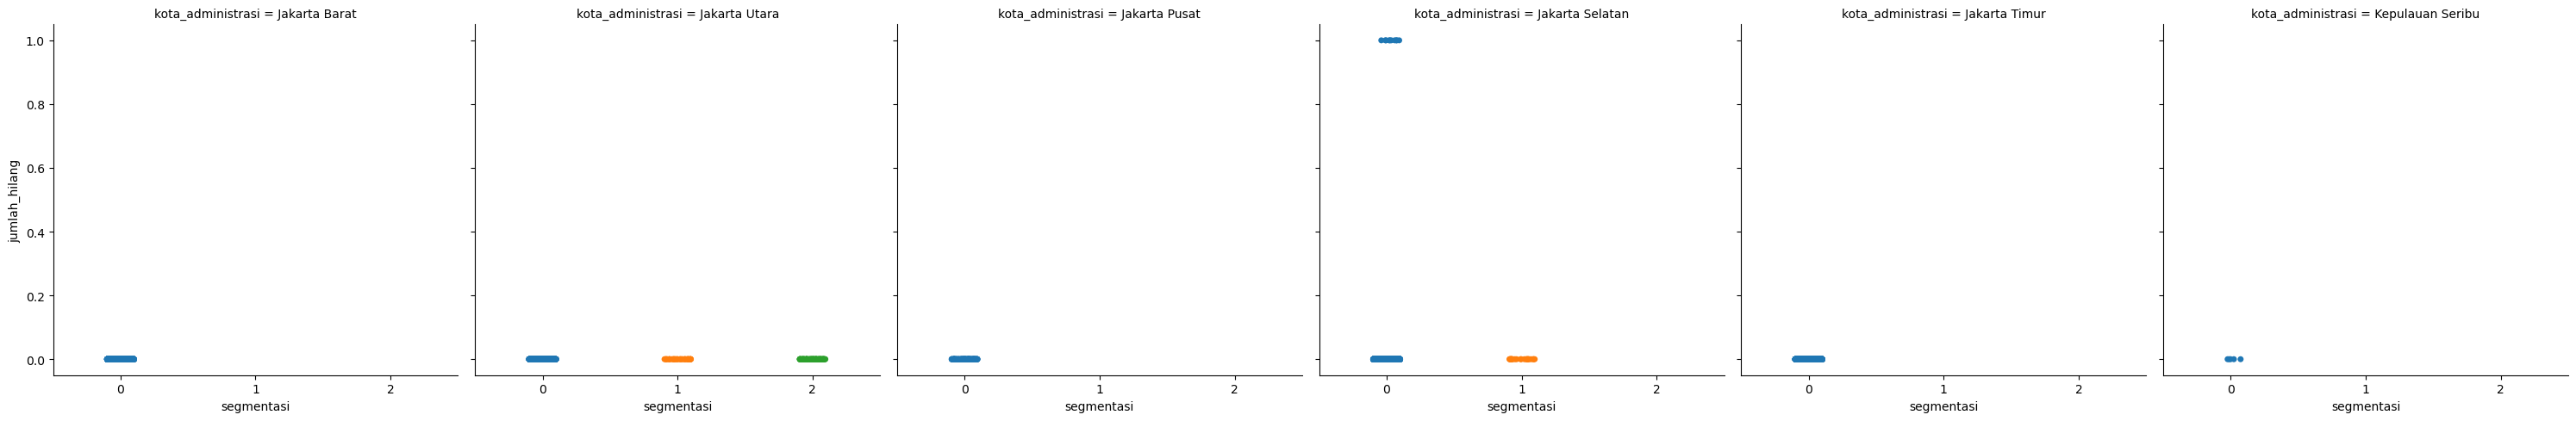

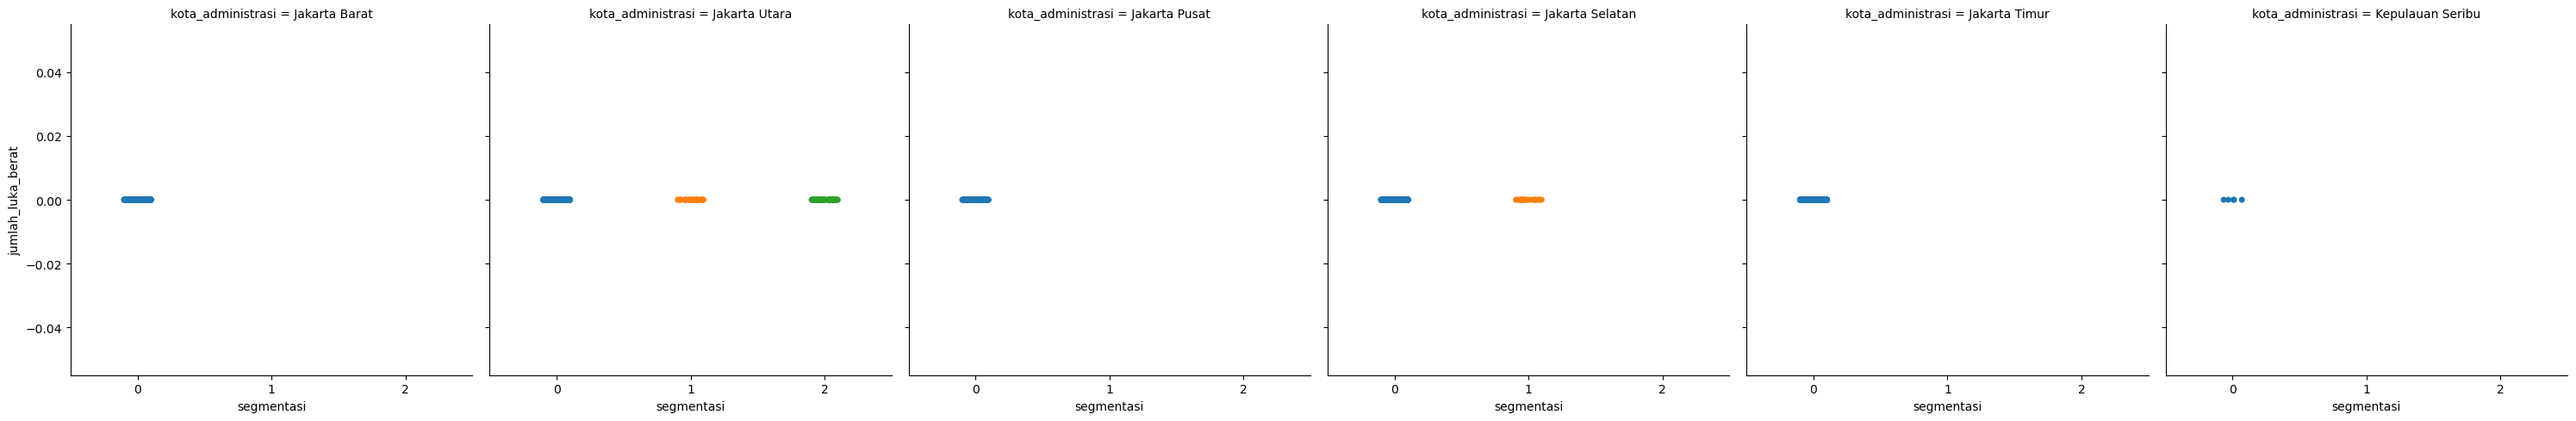

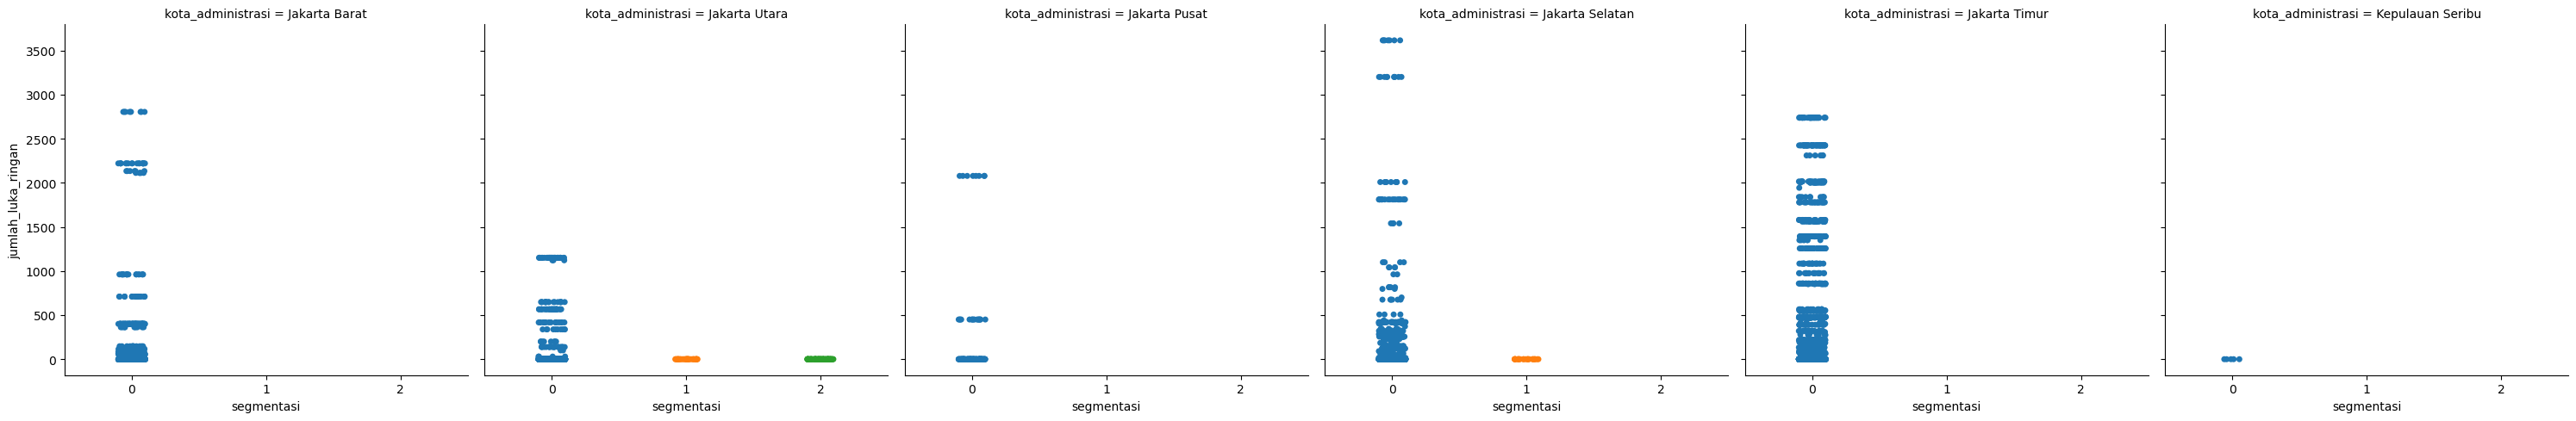

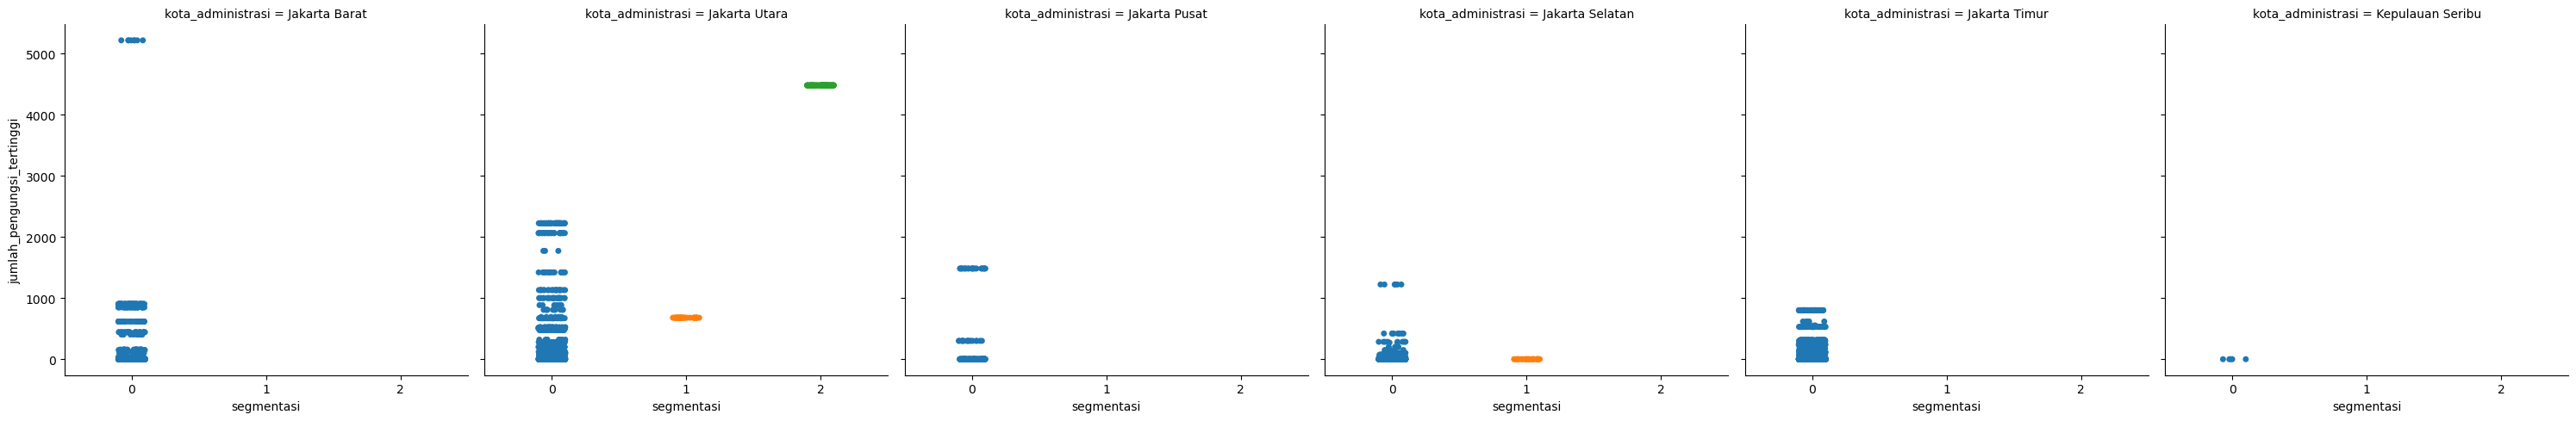

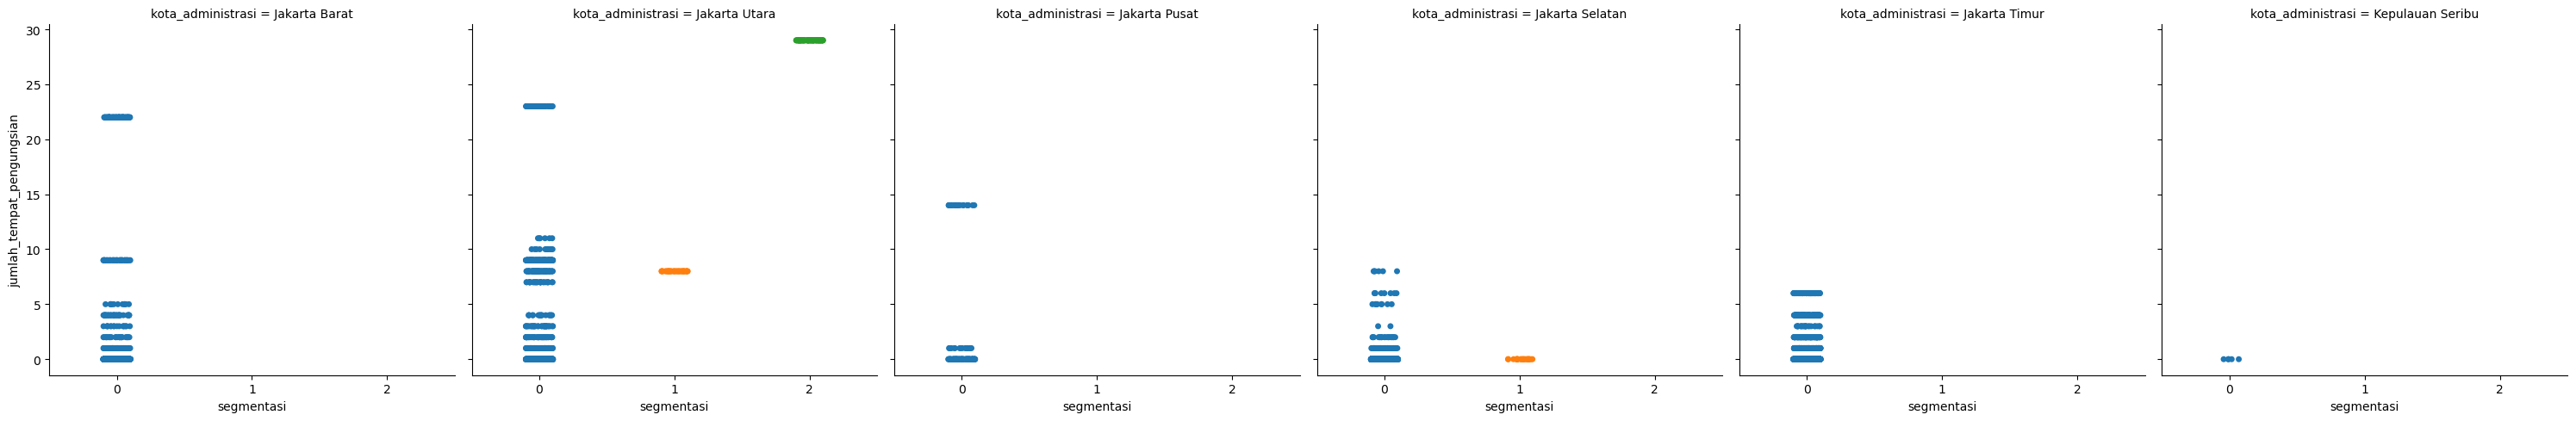

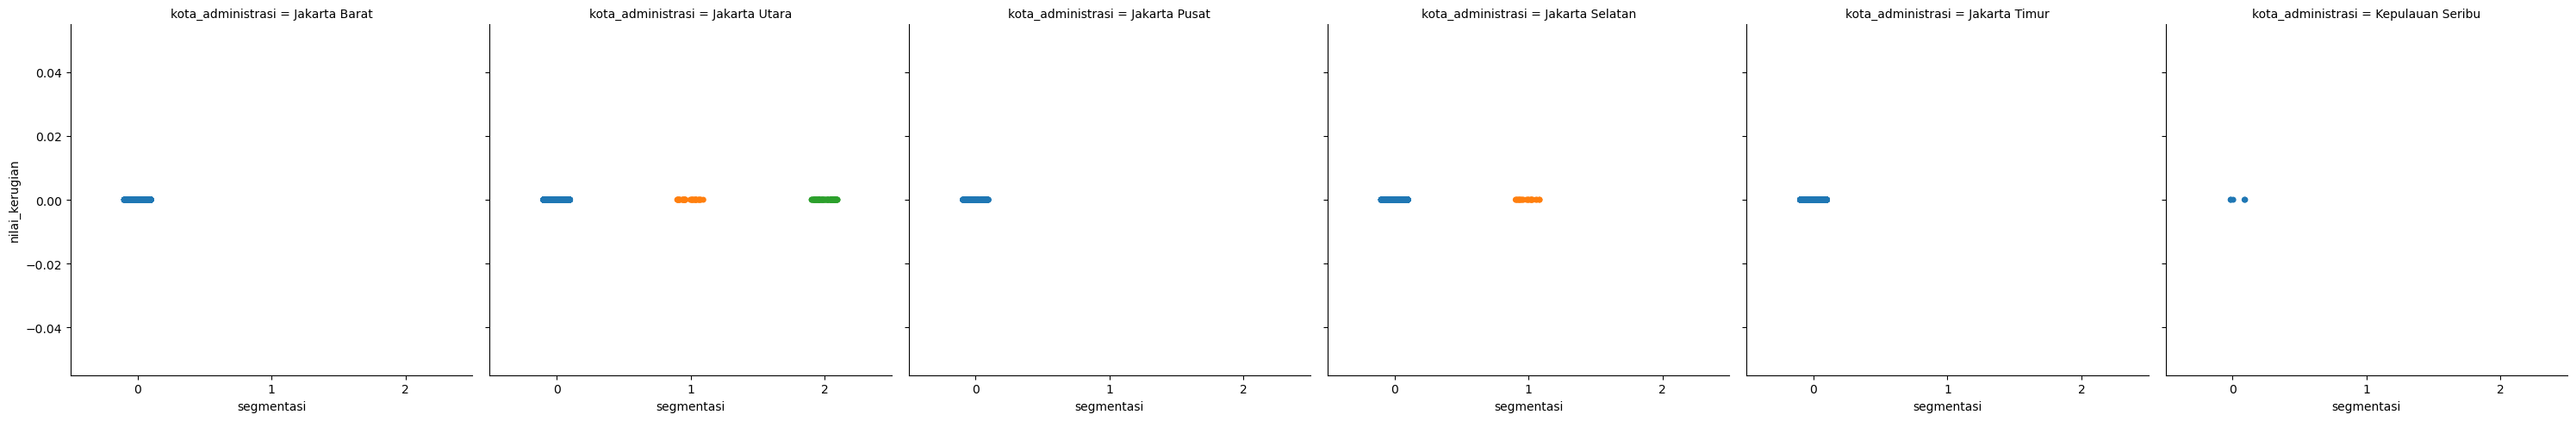

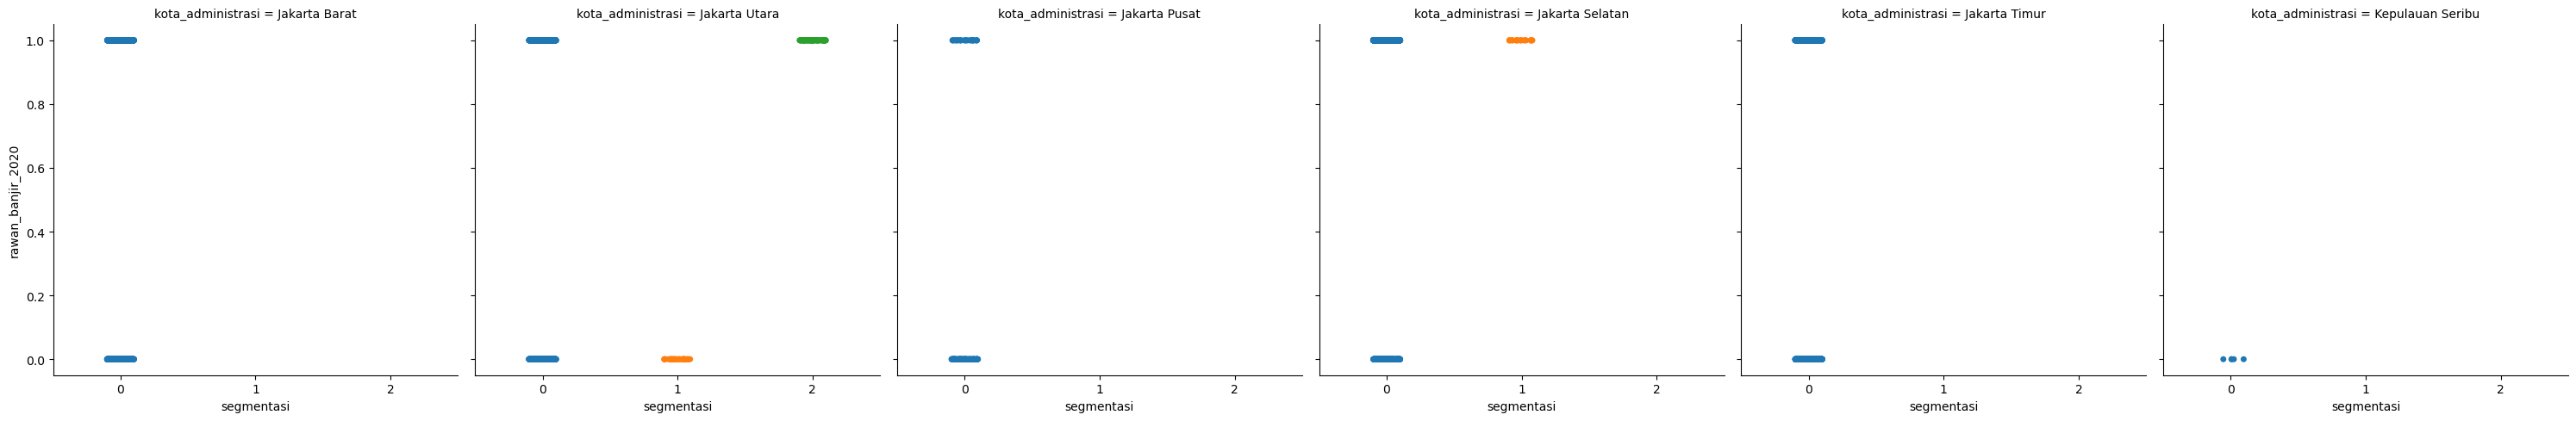

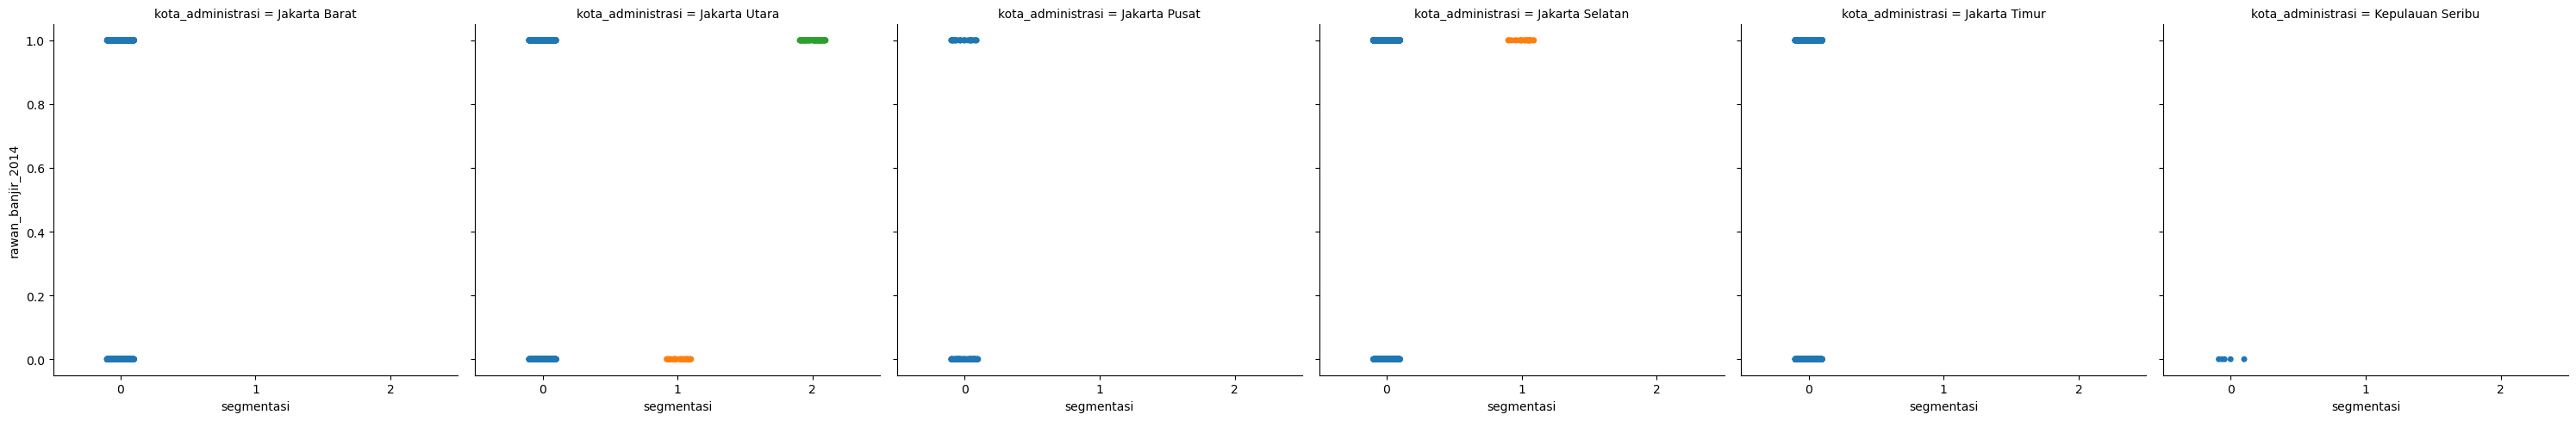

In [39]:
plt.figure(figsize=(10, 5))
sns.catplot(data=Model, x='segmentasi', y='ketinggian_air', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='jumlah_terdampak_rt', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='jumlah_terdampak_kk', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='jumlah_terdampak_jiwa', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='ketinggian_air', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='lama_genangan', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='jumlah_meninggal', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='jumlah_hilang', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='jumlah_luka_berat', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='jumlah_luka_ringan', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='jumlah_pengungsi_tertinggi', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='jumlah_tempat_pengungsian', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='nilai_kerugian', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='rawan_banjir_2020', col = 'kota_administrasi')
sns.catplot(data=Model, x='segmentasi', y='rawan_banjir_2014', col = 'kota_administrasi')
plt.show() 

In [40]:
pd.set_option('display.max_row', None)
(Model[Model['segmentasi']==1])


,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,bulan,tahun,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,sungai,rawan_banjir_2020,rawan_banjir_2014,segmentasi
7817,Jakarta Utara,Tanjung Priok,Sunter Jaya,1,104.0,9804,32799,50,9,Februari,2015,4.0,0.0,0.0,0.0,0.0,678.0,8.0,0.0,SUNTER,0,0,1
7818,Jakarta Utara,Tanjung Priok,Sunter Jaya,1,104.0,9804,32799,50,10,Februari,2015,4.0,0.0,0.0,0.0,0.0,678.0,8.0,0.0,SUNTER,0,0,1
7819,Jakarta Utara,Tanjung Priok,Sunter Jaya,1,104.0,9804,32799,50,11,Februari,2015,4.0,0.0,0.0,0.0,0.0,678.0,8.0,0.0,SUNTER,0,0,1
7820,Jakarta Utara,Tanjung Priok,Sunter Jaya,1,104.0,9804,32799,50,12,Februari,2015,4.0,0.0,0.0,0.0,0.0,678.0,8.0,0.0,SUNTER,0,0,1
7821,Jakarta Utara,Tanjung Priok,Sunter Jaya,2,104.0,9804,32799,50,9,Februari,2015,4.0,0.0,0.0,0.0,0.0,678.0,8.0,0.0,SUNTER,0,0,1
7822,Jakarta Utara,Tanjung Priok,Sunter Jaya,2,104.0,9804,32799,50,10,Februari,2015,4.0,0.0,0.0,0.0,0.0,678.0,8.0,0.0,SUNTER,0,0,1
7823,Jakarta Utara,Tanjung Priok,Sunter Jaya,2,104.0,9804,32799,50,11,Februari,2015,4.0,0.0,0.0,0.0,0.0,678.0,8.0,0.0,SUNTER,0,0,1
7824,Jakarta Utara,Tanjung Priok,Sunter Jaya,2,104.0,9804,32799,50,12,Februari,2015,4.0,0.0,0.0,0.0,0.0,678.0,8.0,0.0,SUNTER,0,0,1
7825,Jakarta Utara,Tanjung Priok,Sunter Jaya,3,104.0,9804,32799,50,9,Februari,2015,4.0,0.0,0.0,0.0,0.0,678.0,8.0,0.0,SUNTER,0,0,1
7826,Jakarta Utara,Tanjung Priok,Sunter Jaya,3,104.0,9804,32799,50,10,Februari,2015,4.0,0.0,0.0,0.0,0.0,678.0,8.0,0.0,SUNTER,0,0,1


In [41]:
pd.reset_option('display.max_row')

In [42]:
'''Model[Model['tahun']==2018]'''

"Model[Model['tahun']==2018]"

In [43]:
Model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7104 entries, 0 to 35735
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   kota_administrasi           7104 non-null   object 
 1   kecamatan                   7104 non-null   object 
 2   kelurahan                   7104 non-null   object 
 3   rw                          7104 non-null   int64  
 4   jumlah_terdampak_rt         7104 non-null   float64
 5   jumlah_terdampak_kk         7104 non-null   int64  
 6   jumlah_terdampak_jiwa       7104 non-null   int64  
 7   ketinggian_air              7104 non-null   int64  
 8   tanggal_kejadian            7104 non-null   int64  
 9   bulan                       7104 non-null   object 
 10  tahun                       7104 non-null   int64  
 11  lama_genangan               7104 non-null   float64
 12  jumlah_meninggal            7104 non-null   float64
 13  jumlah_hilang               7104